In [1]:
import torch 
import os
import json
import deep_sdf
import deep_sdf.workspace as ws
import scipy.io
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

experiment_directory = "test_experiment"
checkpoint = "45"

specs_filename = os.path.join(experiment_directory, "specs.json")

specs = json.load(open(specs_filename))

arch = __import__("networks." + specs["NetworkArch"], fromlist=["Decoder"])

latent_size = specs["CodeLength"]

decoder = arch.Decoder(latent_size, **specs["NetworkSpecs"])

decoder = torch.nn.DataParallel(decoder)
decoder.eval()

saved_model_state = torch.load(
    os.path.join(experiment_directory, ws.model_params_subdir, checkpoint + ".pth"
    )
)
saved_model_epoch = saved_model_state["epoch"]

decoder.load_state_dict(saved_model_state["model_state_dict"])

if torch.cuda.is_available():
    decoder = decoder.module.cuda()
else:
    decoder = decoder.module
geom_dimension = decoder.geom_dimension



c:\Users\mkofler\miniconda3\envs\pytorch\Lib\site-packages\torch\nn\utils\weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

tensor([[ 0.1848, -0.2688, -0.0587,  0.1431, -0.1641, -0.1723, -0.1571,  0.1568,
         -0.3401, -0.1253,  0.1613, -0.1383, -0.1222,  0.1545,  0.0701, -0.1347]],
       grad_fn=<SelectBackward0>)


/tmp/ipykernel_663/2737149768.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[0].scatter(xyz[:,0], xyz[:,1], c=xyz[:,2], cmap = cm.get_cmap("seismic"), vmin=-0.1, vmax=0.1)
/tmp/ipykernel_663/2737149768.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[1].scatter(xyz[:,0], xyz[:,1], c=pred_sdf.detach().numpy(),cmap = cm.get_cmap("seismic"), vmin=-0.1, vmax=0.1)


tensor([[ 0.1195, -0.1429,  0.0655, -0.0537,  0.0009, -0.1345, -0.0398,  0.1852,
         -0.2959, -0.0471,  0.0263, -0.0262,  0.0824, -0.0774,  0.2298,  0.0385]],
       grad_fn=<SelectBackward0>)
tensor([[-0.0158,  0.0131,  0.0911, -0.1259, -0.1301, -0.1807,  0.0172,  0.1891,
         -0.1270, -0.2410, -0.0007, -0.0995, -0.0687, -0.0160,  0.1370,  0.1821]],
       grad_fn=<SelectBackward0>)


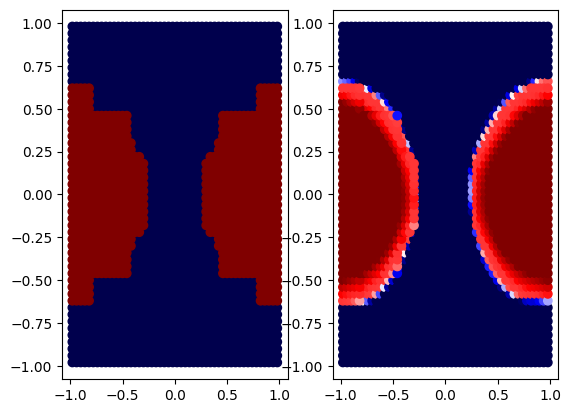

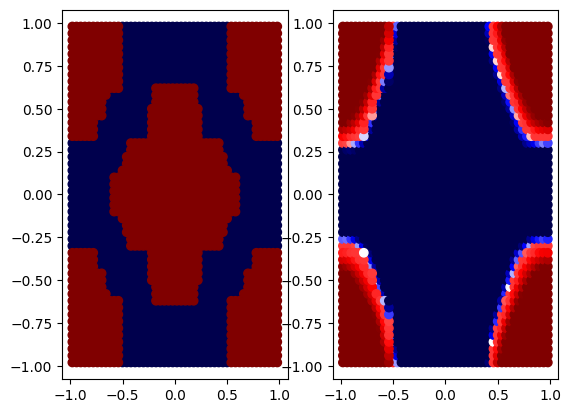

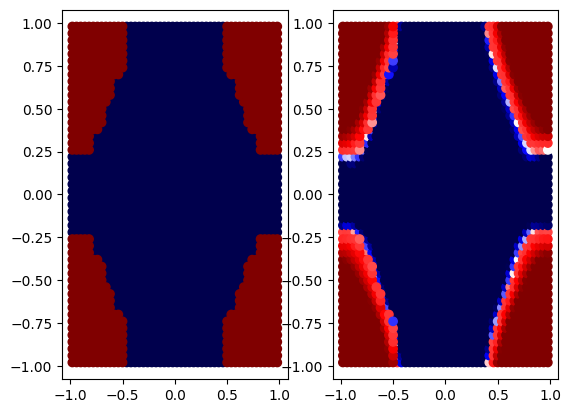

In [ ]:
files = [f[:-5] for f in os.listdir(f"./test_experiment/Reconstructions/{checkpoint}/Codes/Wang2021/class1/")]

if len(files) > 3:
    files = random.sample(files, k=3)

for file in files:
    latent = torch.load(f"test_experiment/Reconstructions/{checkpoint}/Codes/Wang2021/class1/{file}..pth")
    npz = np.load(f"data/SdfSamples/Wang2021/class1/{str(file)}.npz")
    neg = torch.from_numpy(npz["neg"]).float()
    pos = torch.from_numpy(npz["pos"]).float()
    xyz = torch.cat([neg, pos], 0)

    xyz_q = xyz[:, 0:2]

    print(latent[0])
    num_samples = xyz_q.shape[0]
    latent_inputs = latent[0].expand(num_samples, -1)
    inputs = torch.cat([latent_inputs, xyz_q], 1)
    pred_sdf = decoder(inputs)
    


    fig, ax = plt.subplots(1, 2)

    ax[0].scatter(xyz[:,0], xyz[:,1], c=xyz[:,2], cmap = cm.get_cmap("seismic"), vmin=-2, vmax=2)
    ax[1].scatter(xyz[:,0], xyz[:,1], c=pred_sdf.detach().numpy(),cmap = cm.get_cmap("seismic"), vmin=-2, vmax=2)

In [ ]:
mat = scipy.io.loadmat('./Wang2021/Geometries.mat')
geoms = mat["Geometries"]
mat = scipy.io.loadmat('./Wang2021/Properties.mat')
properties = mat["Properties"]

/tmp/ipykernel_663/709638243.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  axs[i,1].scatter(xyz[:,0], xyz[:,1], c=xyz[:,2], cmap = cm.get_cmap("seismic"), vmin=-0.1, vmax=0.1)


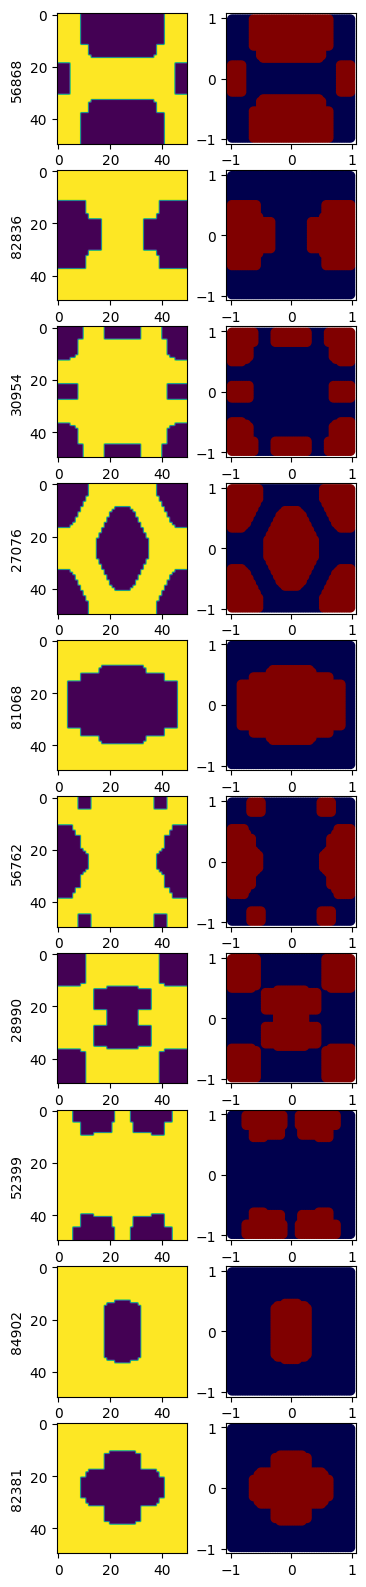

In [5]:
files = np.random.randint(0, 90000, size=10)
fig, axs = plt.subplots(10,2, figsize=(4,20))
for i, file in enumerate(files):
    #latent = torch.load(f"test_experiment/Reconstructions/10/Codes/Wang2021/class1/{file}..pth")
    npz = np.load(f"data/SdfSamples/Wang2021/class1/{str(file)}.npz")
    neg = torch.from_numpy(npz["neg"]).float()
    pos = torch.from_numpy(npz["pos"]).float()
    xyz = torch.cat([neg, pos], 0)

    axs[i,0].imshow(geoms[:,:,file].T)
    axs[i,1].scatter(xyz[:,0], xyz[:,1], c=xyz[:,2], cmap = cm.get_cmap("seismic"), vmin=-0.1, vmax=0.1)
    axs[i,0].set_aspect(1)
    axs[i,1].set_aspect(1)
    axs[i,0].set_ylabel(file)
    